In [1]:
%pip install --upgrade --quiet pymupdf Pillow langchain langchain-core langchain_huggingface langchain-google-genai langchain-pinecone langchain-community sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.9/437.9 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7

In [2]:
from pinecone import Pinecone, ServerlessSpec
from google.colab import userdata
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_pinecone import PineconeVectorStore
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
import os
pdf_file_path = "data\GPU.pdf"
PINECONE_API_KEY = os.environ.get("PINECONE_API_KEY")
GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")

if not PINECONE_API_KEY:
    raise ValueError("PINECONE_API_KEY environment variable not set.")
if not GOOGLE_API_KEY:
    raise ValueError("GOOGLE_API_KEY_1 environment variable not set.")

In [5]:
from langchain.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(pdf_file_path)
documents = loader.load()

In [54]:
import fitz
import io
from PIL import Image
import os

def extract_images_from_pdf(pdf_path, output_folder):
    """
    Extracts images from a PDF file and saves them to a specified folder.

    Args:
        pdf_path (str): The path to the PDF file.
        output_folder (str): The folder where extracted images will be saved.
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    doc = fitz.open(pdf_path)
    image_count = 0

    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        image_list = page.get_images(full=True)

        if not image_list:
            continue

        for img_index, img in enumerate(image_list):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]

            # Convert to PIL Image object
            try:
                image = Image.open(io.BytesIO(image_bytes))
                image_filename = f"image_p{page_num+1}_{img_index+1}.{image_ext}"
                image_path = os.path.join(output_folder, image_filename)

                # Save the image
                image.save(open(image_path, "wb"))
                image_count += 1
                print(f"Saved: {image_path}")
            except Exception as e:
                print(f"Error processing image on page {page_num+1}, index {img_index+1}: {e}")

    print(f"\nExtraction complete. Found and saved {image_count} images in '{output_folder}'.")
    doc.close()


output_directory = "Images"

# Check if the PDF file exists before proceeding
if os.path.exists(pdf_file_path):
    extract_images_from_pdf(pdf_file_path, output_directory)
else:
    print(f"Error: PDF file not found at '{pdf_file_path}'. Please check the path.")

Saved: Images/image_p3_1.jpeg
Saved: Images/image_p3_2.jpeg
Saved: Images/image_p4_1.jpeg
Saved: Images/image_p4_2.jpeg
Saved: Images/image_p4_3.jpeg
Saved: Images/image_p5_1.jpeg
Saved: Images/image_p6_1.jpeg
Saved: Images/image_p6_2.jpeg
Saved: Images/image_p8_1.jpeg
Saved: Images/image_p10_1.jpeg
Saved: Images/image_p10_2.jpeg
Saved: Images/image_p10_3.jpeg
Saved: Images/image_p10_4.jpeg
Saved: Images/image_p11_1.jpeg
Saved: Images/image_p12_1.jpeg
Saved: Images/image_p13_1.jpeg
Saved: Images/image_p13_2.jpeg
Saved: Images/image_p14_1.jpeg
Saved: Images/image_p17_1.jpeg
Saved: Images/image_p17_2.jpeg
Saved: Images/image_p17_3.jpeg
Saved: Images/image_p19_1.jpeg
Saved: Images/image_p20_1.jpeg
Saved: Images/image_p20_2.jpeg
Saved: Images/image_p21_1.jpeg
Saved: Images/image_p21_2.jpeg
Saved: Images/image_p21_3.jpeg
Saved: Images/image_p21_4.jpeg
Saved: Images/image_p22_1.png
Saved: Images/image_p24_1.jpeg
Saved: Images/image_p25_1.jpeg
Saved: Images/image_p26_1.jpeg
Saved: Images/imag

In [7]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,725 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,363 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,245 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinoi

In [8]:
!pip install pytesseract

In [9]:
# --- NEW CODE FOR OCR INTEGRATION STARTS HERE ---
import fitz
import io
from PIL import Image
import pytesseract

# pytesseract.pytesseract.tesseract_cmd = r"/content/drive/MyDrive/Tesseract-OCR/tesseract.exe" # Make sure this path is correct or Tesseract is in PATH

def ocr_images_on_page_from_fitz_doc(fitz_page_obj: fitz.Page) -> dict:
    """
    Extracts images from a fitz.Page object, performs OCR,
    and returns a dictionary of image identifiers and their text.
    Format: {'image_<page_number>_<serial_number>': 'ocr_text', ...}
    Returns an empty dictionary if no images or no text found.
    """
    page_image_data = {} # Dictionary to store OCR results for the page
    image_list = fitz_page_obj.get_images(full=True)

    if not image_list:
        return {} # Return empty dict if no images

    doc = fitz_page_obj.parent # Get the parent document to extract image bytes
    page_number_1_indexed = fitz_page_obj.number + 1

    for img_index, img_info in enumerate(image_list):
        xref = img_info[0]
        serial_number = img_index + 1
        image_key = f"image_p{page_number_1_indexed}_{serial_number}"
        try:
            base_image = doc.extract_image(xref)
            if not base_image or not base_image.get("image"):
                continue
            image_bytes = base_image["image"]

            pil_image = Image.open(io.BytesIO(image_bytes))
            text = pytesseract.image_to_string(pil_image)
            if text.strip():
                page_image_data[image_key] = text.strip()

        except Exception as ocr_e:
            print(f"Error performing OCR on image {serial_number} from page {page_number_1_indexed} (xref: {xref}): {ocr_e}")
            pass

    return page_image_data

print(f"Loaded {len(documents)} document sections from PDF via Langchain loader.")

processed_documents_with_ocr = []
opened_fitz_docs_cache = {}

for i, lc_doc in enumerate(documents):
    page_num_0_indexed = lc_doc.metadata.get('page')
    source_pdf_path = lc_doc.metadata.get('source')

    if page_num_0_indexed is not None and source_pdf_path is not None:
        try:
            if source_pdf_path not in opened_fitz_docs_cache:
                print(f"Opening PDF for direct access: {source_pdf_path}")
                opened_fitz_docs_cache[source_pdf_path] = fitz.open(source_pdf_path)

            fitz_doc = opened_fitz_docs_cache[source_pdf_path]

            if 0 <= page_num_0_indexed < len(fitz_doc):
                fitz_page = fitz_doc.load_page(page_num_0_indexed)

                ocr_data_from_images = ocr_images_on_page_from_fitz_doc(fitz_page)

                if ocr_data_from_images: # If the dictionary is not empty
                    print(f"Found OCR data for {len(ocr_data_from_images)} image(s) on page {page_num_0_indexed + 1} from '{source_pdf_path}'. Storing in metadata.")
                    lc_doc.metadata['image_data'] = ocr_data_from_images

                processed_documents_with_ocr.append(lc_doc)
            else:
                print(f"Warning: Page number {page_num_0_indexed + 1} (0-indexed: {page_num_0_indexed}) is out of range for PDF {source_pdf_path} (total pages: {len(fitz_doc)}). Skipping OCR for this doc section.")
                processed_documents_with_ocr.append(lc_doc)

        except Exception as e:
            print(f"Error processing Langchain doc {i} (page {page_num_0_indexed + 1} from {source_pdf_path}) for OCR: {e}")
            processed_documents_with_ocr.append(lc_doc)
    else:
        print(f"Skipping Langchain doc {i} due to missing 'page' or 'source' metadata. Cannot perform OCR.")
        processed_documents_with_ocr.append(lc_doc)

for fitz_doc_obj in opened_fitz_docs_cache.values():
    print(f"Closing directly accessed PDF: {fitz_doc_obj.name}")
    fitz_doc_obj.close()

print(f"Finished OCR processing. Number of documents for splitting: {len(processed_documents_with_ocr)}")

Loaded 54 document sections from PDF via Langchain loader.
Opening PDF for direct access: /content/GPU.pdf
Found OCR data for 2 image(s) on page 3 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 3 image(s) on page 4 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 1 image(s) on page 5 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 2 image(s) on page 6 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 1 image(s) on page 8 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 4 image(s) on page 10 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 1 image(s) on page 11 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 1 image(s) on page 12 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 1 image(s) on page 13 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 3 image(s) on page 17 from '/content/GPU.pdf'. Storing in metadata.
Found OCR data for 1 image(s

In [11]:
for doc in processed_documents_with_ocr:
    #delete some keys from metadata to save context, these are unnecesary and have no valuable information
    for key in ['creator', 'producer', 'format', 'title', 'author', 'source','subject', 'keywords', 'trapped', 'moddate', 'modDate','creationdate']:
        if key in doc.metadata:
            del doc.metadata[key]

In [12]:
image_pages = []
for doc in processed_documents_with_ocr:
    if doc.metadata.get('image_data'):
        image_pages.append(doc)

In [13]:
embedding_model = HuggingFaceEmbeddings(
    model_name="intfloat/multilingual-e5-large-instruct",
    model_kwargs={'device': 'cpu'} # Use 'cuda' if GPU is available and configured
)
embedding_dimensions = len(embedding_model.embed_query("test"))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

sentence_xlm-roberta_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

In [17]:
import json

pc = Pinecone(api_key=PINECONE_API_KEY)
index_name = "multiagent-rag"

if index_name not in [index['name'] for index in pc.list_indexes()]:
    # Create index if it doesn't exist
    pc.create_index(
        name=index_name,
        dimension=embedding_dimensions,
        metric="cosine",
        spec=ServerlessSpec(
            cloud="aws",
            region="us-east-1"
        )
    )
    print(f"Index '{index_name}' created.")
    pinecone_index = pc.Index(index_name)
else:
    pinecone_index = pc.Index(index_name)
    print(f"Index '{index_name}' already exists and has been initialized")

vector_store = PineconeVectorStore(index=pinecone_index, embedding=embedding_model)

print(f"Adding {len(processed_documents_with_ocr)} chunks to the vector store...")

# Prepare documents for upsertion by serializing the 'image_data' metadata
documents_to_upsert = []
for doc in processed_documents_with_ocr:
    if 'image_data' in doc.metadata and isinstance(doc.metadata['image_data'], dict):
        # Serialize the dictionary to a JSON string
        doc.metadata['image_data'] = json.dumps(doc.metadata['image_data'])
    documents_to_upsert.append(doc)

# Add the prepared documents to the vector store
vector_store.add_documents(documents_to_upsert)
print("Finished adding Document pages")

Index 'multiagent-rag' already exists and has been initialized
Adding 54 chunks to the vector store...
Finished adding Document pages


In [24]:
class RetrievalAgent:
    def __init__(self):
        self.embeddings = embedding_model
        self.vector_store = vector_store

    def retrieve(self, query, k=3):
        """Retrieve the top-k most relevant documents for the query"""
        docs = self.vector_store.similarity_search_with_score(query, k=k)
        return docs

In [75]:
agent = RetrievalAgent()
results = agent.retrieve("Can you give me some insights on GPU Hardware Specs")
for doc,score in results:
    print(f"Similarity={score:3f}")
    print(doc.page_content)
    print(doc.metadata['image_data'])
    print("-" * 80)

Similarity=0.885100
Source:
V100 GPU white paper, NVIDIA
GPU Hardware (specs)
{"image_p6_1": "a\n\nTesla Pro\n\nGK180 (Kepler)\n\nTesla Ma0_\nGM200 (Maxwell) | GP100 10 (Pascal)\n\nGV100 (Volta)\n\n \n\nTPCs\n\n15\n\n24 56\n\n80\n\n \n\nFP32 Cores /SM\n\n64\n\n64\n\n \n\nFP32 Cores / GPU\n\n5120\n\n \n\nFP64 Cores / SM\n\n64\n\n4 32\n\n32\n\n \n\nFP64 Cores / GPU\n\n96\n\n2560\n\n \n\nTensor Cores / SM\n\nNA\n\nNA NA\n\n8\n\n \n\nTensor Cores / GPU\n\nNA\n\nNA NA\n\n640\n\n \n\nGPU Boost Clock\n\n810/875 MHz\n\n1114 MHz 1480 MHz\n\n1530 MHz\n\n \n\nPeak FP32 TFLOPS?\n\n5\n\n6.8 10.6\n\n15.7\n\n \n\nPeak FP64 TFLOPS!\nPeak Tensor TFLOPS?\nTexture Units\nMemory Interface\nMemory Size\n\nL2 Cache Size\n\nShared Memory Size /\nSM\n\n384-bit GDDR5S\nUp to 12 GB\n1536 KB\n\n16 KB/32 KB/48\nKB\n\n5.3 7.8\nNA 125\n4096-bit HBM2 | 4096-bit HBM2\n\n16 GB 16 GB\n4096 KB 6144 kB\n\nConfigurable up\nto 96 KB\n\n384-bit GDDR5\nUp to 24 GB\n3072 KB\n\n \n\nRegister File Size / SM\n\n256 KB\n\n256KB\n

Attempting to display images based on retrieved OCR data:
Displaying: Images/image_p6_1.jpeg


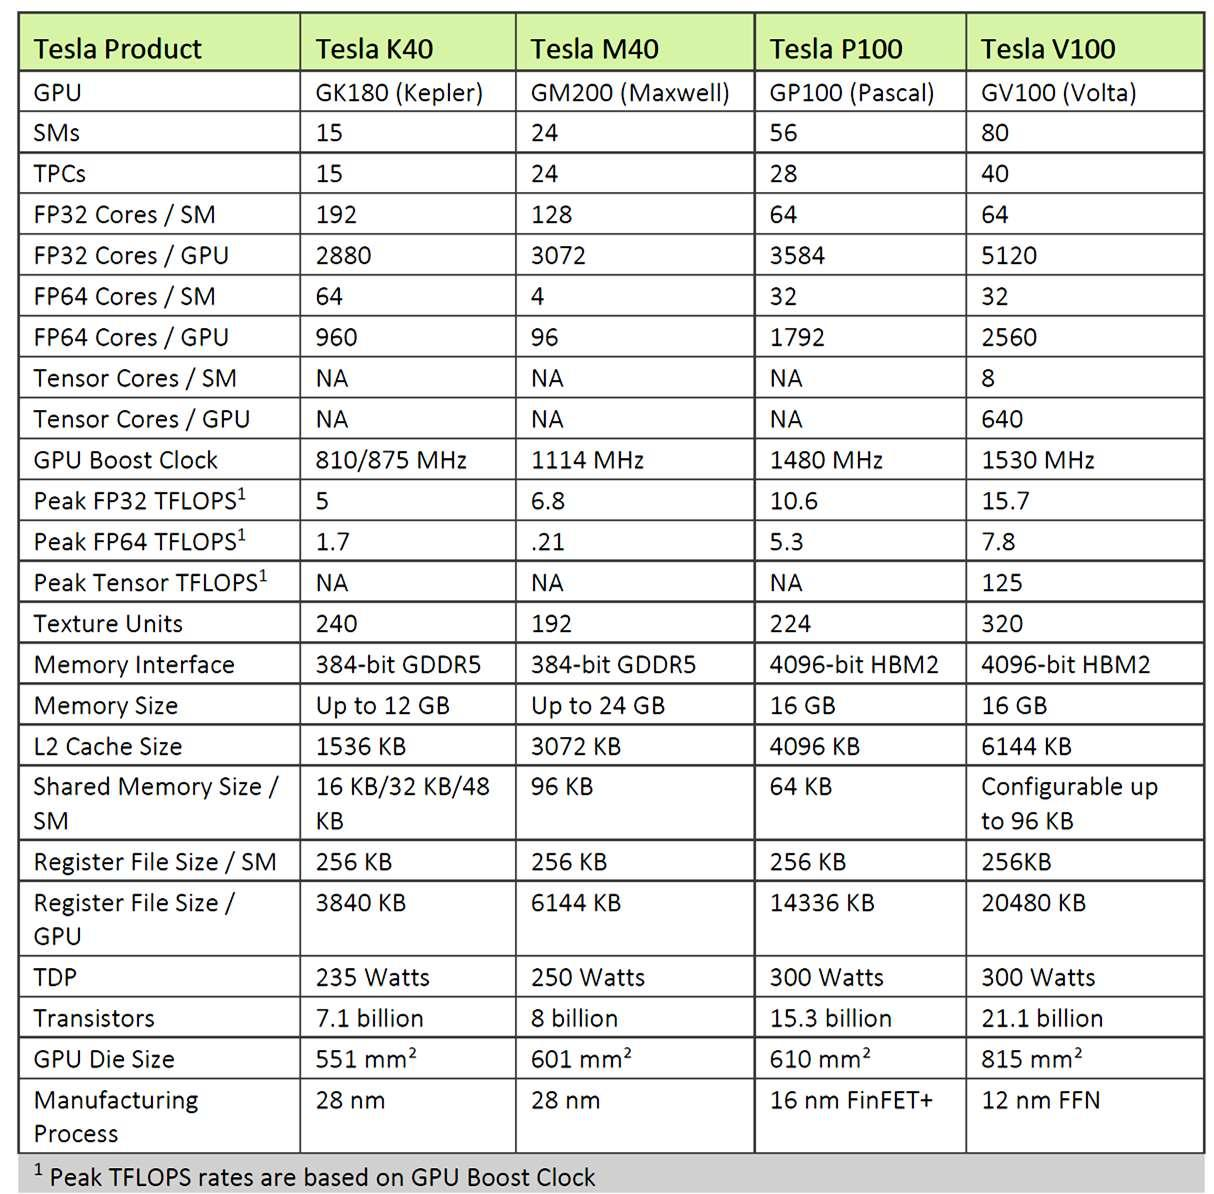

Displaying: Images/image_p6_2.jpeg


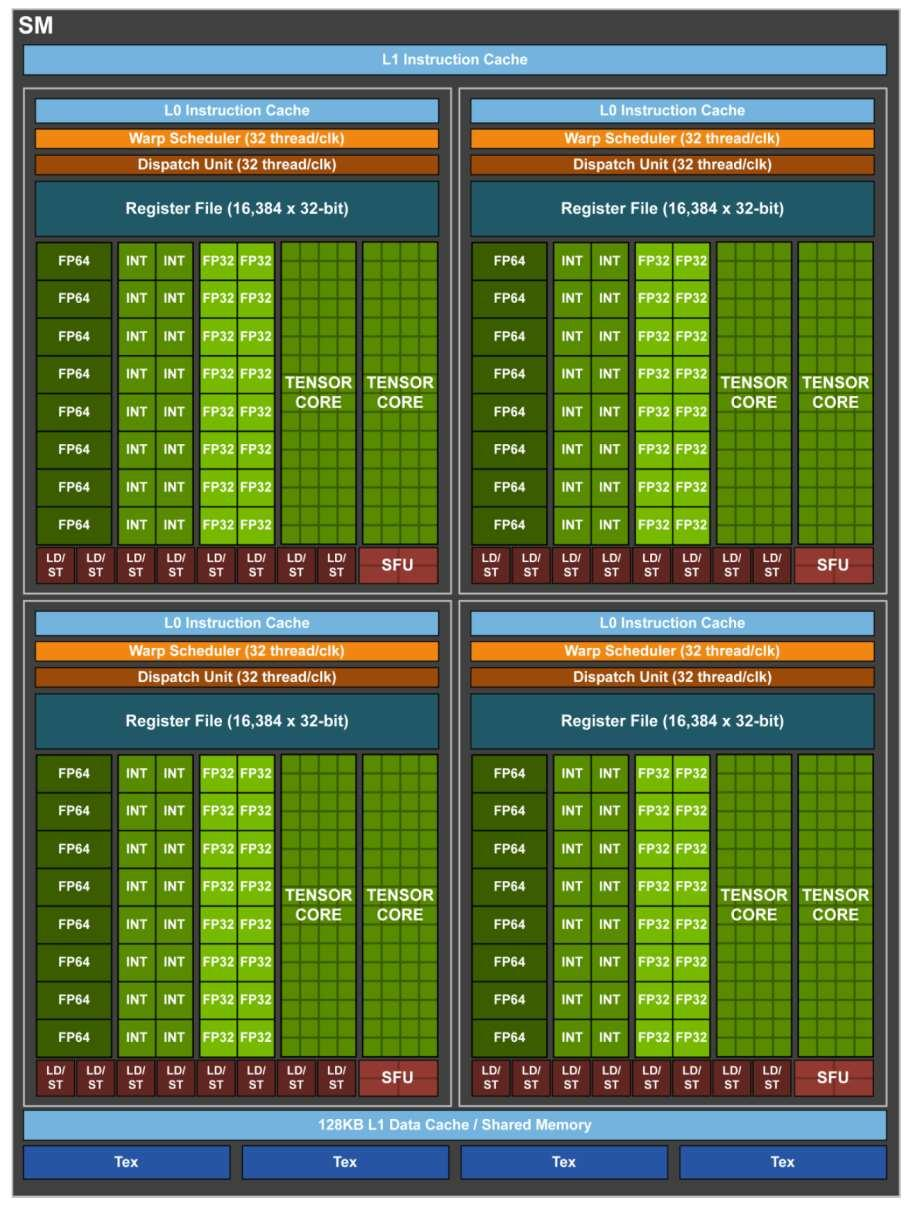

Displaying: Images/image_p10_1.jpeg


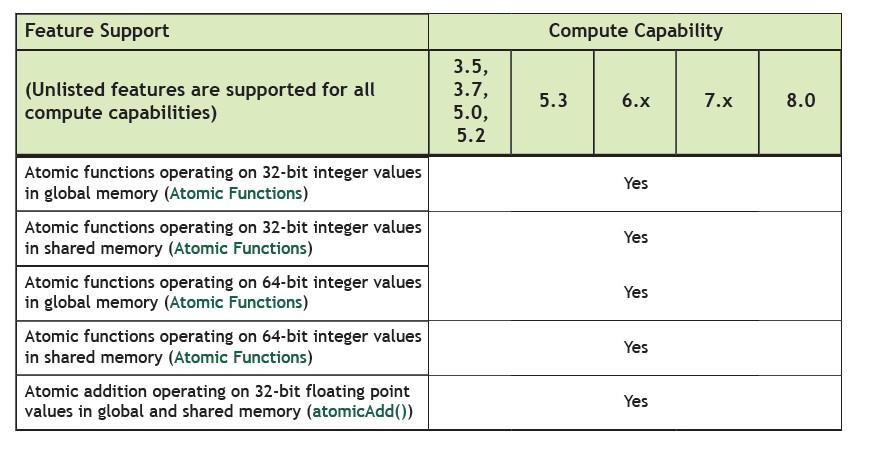

Displaying: Images/image_p10_2.jpeg


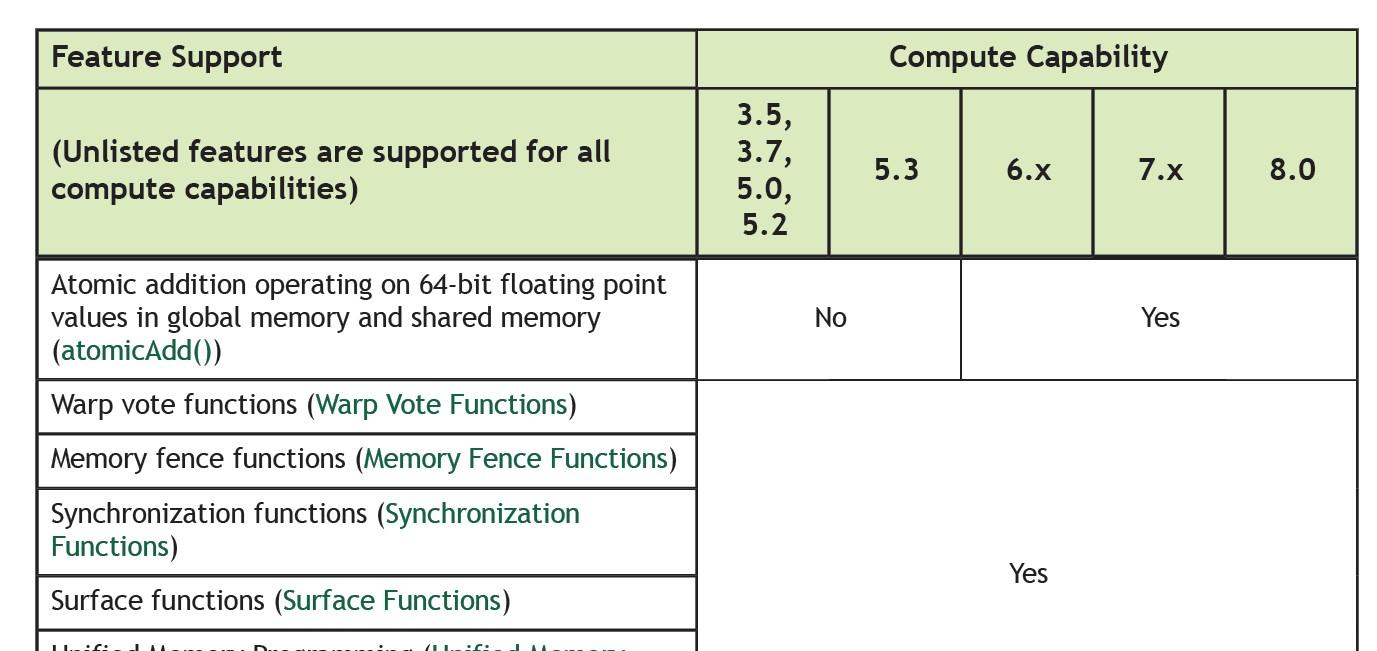

Displaying: Images/image_p10_3.jpeg


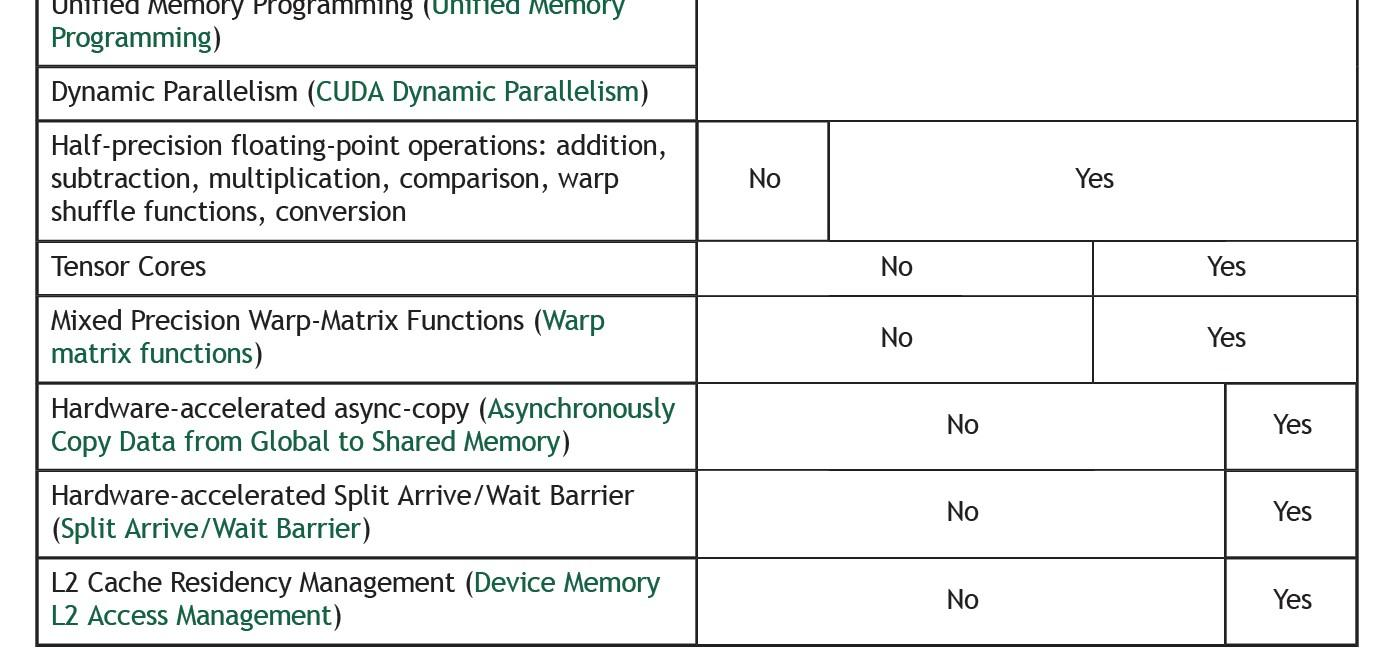

Displaying: Images/image_p10_4.jpeg


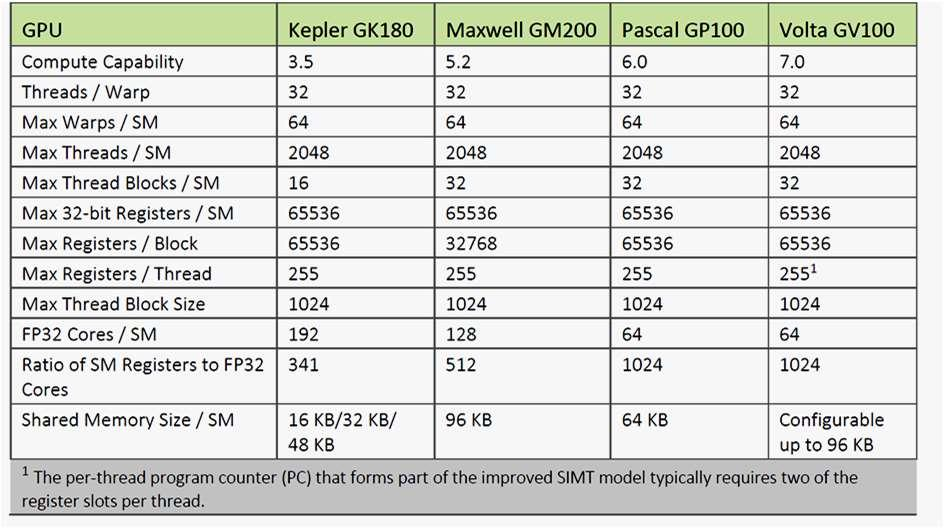

Displaying: Images/image_p5_1.jpeg


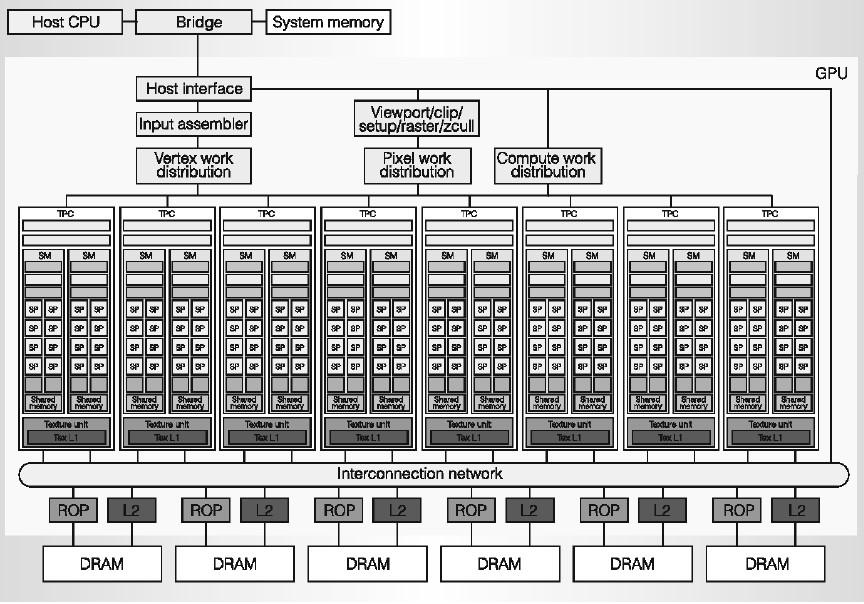


Finished attempting to display images.


In [74]:
import json
import os
from IPython.display import Image, display

image_directory = "Images"
available_image_files = os.listdir(image_directory)

results_images_dict = {}
for doc, score in results:
    if doc.metadata.get('image_data'):
        image_data_string = doc.metadata['image_data']
        try:
            image_data_dict = json.loads(image_data_string)
            results_images_dict.update(image_data_dict)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON string for doc page {doc.metadata.get('page')}: {e}")
            print(f"The string was: {image_data_string}")

print("Attempting to display images based on retrieved OCR data:")

# Now iterate through the keys from the combined OCR dictionary
for image_key in list(results_images_dict.keys()):
    found_file = None
    for filename in available_image_files:
        if filename.startswith(image_key):
            found_file = filename
            break

    if found_file:
        image_path_to_display = os.path.join(image_directory, found_file)
        print(f"Displaying: {image_path_to_display}")
        try:
            display(Image(filename=image_path_to_display))
        except Exception as e:
            print(f"Error displaying image '{found_file}': {e}")
    else:
        print(f"Warning: Could not find image file for key '{image_key}' in '{image_directory}'. Skipping display.")

In [28]:
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

class ResponseGenerator:
    def __init__(self, retrieval_agent):
        self.retrieval_agent = retrieval_agent

        self.llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-pro",api_key=userdata.get("GOOGLE_API_KEY_1"))

        # Create prompt template
        self.prompt_template = PromptTemplate.from_template(
            """You are a helpful assistant that answers questions based on the provided context.

            Context:
            {context}

            Question: {query}

            Please provide a detailed and accurate answer based only on the information in the context.
            If the context doesn't contain relevant information to answer the question, say so.
            """
        )

        # Setup response chain
        self.chain = (
            {"context": self.retrieve_docs, "query": RunnablePassthrough()}
            | self.prompt_template
            | self.llm
            | StrOutputParser()
        )

    def retrieve_docs(self, query):
        docs = self.retrieval_agent.retrieve(query)
        return "\n\n".join([doc[0].page_content for doc in docs])

    def generate_response(self, query):
        return self.chain.invoke(query)

retrieval_agent = RetrievalAgent()
generator = ResponseGenerator(retrieval_agent)
response = generator.generate_response("Can you give me some insights on GPU Hardware Specs")
print(response)

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import json

class ResponseGenerator:
    def __init__(self, retrieval_agent, embedding_model, image_similarity_threshold=0.6):
        self.retrieval_agent = retrieval_agent
        self.embedding_model = embedding_model
        self.image_similarity_threshold = image_similarity_threshold

        self.llm = ChatGoogleGenerativeAI(model="models/gemini-1.5-pro",api_key=userdata.get("GOOGLE_API_KEY_1"))

        # Create prompt template
        self.prompt_template = PromptTemplate.from_template(
            """You are a helpful assistant that answers questions based on the provided context.

            Context:
            {context}

            Question: {query}

            Please provide a detailed and accurate answer based only on the information in the context.
            If the context doesn't contain relevant information to answer the question, say so.
            """
        )

        # Setup response chain
        # The 'context' step will now use the modified method
        self.chain = (
            {"context": self.prepare_context_with_images, "query": RunnablePassthrough()}
            | self.prompt_template
            | self.llm
            | StrOutputParser()
        )

    def calculate_text_image_similarity(self, document):
        """
        Calculates the cosine similarity between the page content and the OCR text
        from images within the document's metadata, using the instance's embedding model and threshold.

        Returns:
            A dictionary where keys are image identifiers and values are their
            similarity scores to the page content, only including scores above the threshold.
        """
        page_content = document.page_content
        image_data_string = document.metadata.get('image_data')
        relevant_image_scores = {}

        if not page_content or not image_data_string:
            return {}

        try:
            image_data_dict = json.loads(image_data_string)
        except json.JSONDecodeError:
            print(f"Error decoding JSON for image_data in document.")
            return {}

        if not image_data_dict:
            return {}

        try:
            page_content_embedding = self.embedding_model.embed_query(page_content)
            page_content_embedding = np.array(page_content_embedding).reshape(1, -1)
        except Exception as e:
            print(f"Error embedding page content for similarity calculation: {e}")
            return {}

        for image_key, ocr_text in image_data_dict.items():
            if ocr_text.strip():
                try:
                    ocr_embedding = self.embedding_model.embed_query(ocr_text)
                    ocr_embedding = np.array(ocr_embedding).reshape(1, -1)
                    similarity_score = cosine_similarity(page_content_embedding, ocr_embedding)[0][0]

                    if similarity_score >= self.image_similarity_threshold:
                        relevant_image_scores[image_key] = similarity_score
                except Exception as e:
                    print(f"Error embedding or calculating similarity for image '{image_key}': {e}")

        return relevant_image_scores

    def prepare_context_with_images(self, query):
        """
        Retrieves documents, filters image OCR data based on similarity to page content,
        and formats the context for the LLM.
        """
        docs_with_scores = self.retrieval_agent.retrieve(query)

        context_parts = []
        for doc, score in docs_with_scores:
            # Start with the page content
            doc_context = doc.page_content
            relevant_images = self.calculate_text_image_similarity(doc)

            if relevant_images:
                image_data_dict = json.loads(doc.metadata['image_data'])
                # Append relevant image OCR text to the context
                doc_context += "\n\n--- Image Content Relevant to Page Text ---\n"
                for image_key, sim_score in relevant_images.items():
                     doc_context += f"{image_data_dict.get(image_key, '')}\n"
                doc_context += "-----------------------------------------\n"


            context_parts.append(doc_context)

        return "\n\n---\n\n".join(context_parts)

    def generate_response(self, query):
        return self.chain.invoke(query)


retrieval_agent = RetrievalAgent()
generator = ResponseGenerator(
    retrieval_agent=retrieval_agent,
    embedding_model=embedding_model,
    image_similarity_threshold=0.6
)

# Generate response using the modified generator
response = generator.generate_response("Can you give me some insights on GPU Hardware Specs")
print(response)